# 당뇨병 수치를 맞춰보자 #

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
col = df.columns.tolist()
len(col)

11

In [4]:
df_x = df[col[0:10]]
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
df_y = df["target"]
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [6]:
df_x, df_y = df_x.values, df_y.values
train_input, test_input, train_target, test_target = train_test_split(df_x, df_y, test_size=0.2)

In [7]:
np.random.seed(21)
W = np.random.rand(10)
b = np.random.rand()

In [8]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [10]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)  
    dW = 1/N * 2 * X.T.dot(y_pred - y) 
    db = 2 * (y_pred - y).mean()
    return dW, db

In [11]:
LEARNING_RATE = 0.1
losses = []

for i in range(1, 6001):
    dW, db = gradient(train_input, W, b, train_target)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(train_input, W, b, train_target)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3485.9432
Iteration 2000 : Loss 3152.5867
Iteration 3000 : Loss 3031.4169
Iteration 4000 : Loss 2980.0434
Iteration 5000 : Loss 2957.3400
Iteration 6000 : Loss 2946.8830


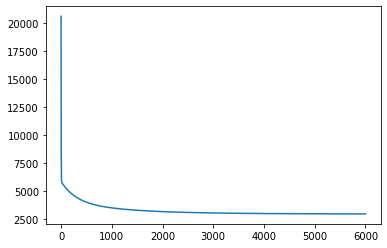

In [12]:
plt.plot(losses)
plt.show()

In [13]:
prediction = model(test_input, W, b)
mse = loss(test_input, W, b, test_target)
mse

2676.3953923550894

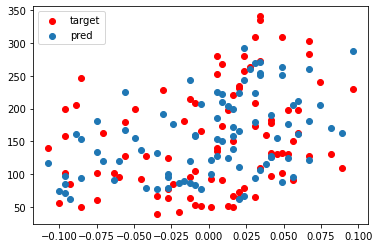

In [14]:
plt.scatter(test_input[:, 0], test_target, label="target", color="red")
plt.scatter(test_input[:, 0], prediction, label="pred")
plt.legend()
plt.show()

# 자전거 타는 사람은 몇 명? #

In [15]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
                    style='darkgrid',
                    palette='pastel',
                    rc=custom_params)

In [17]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [19]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


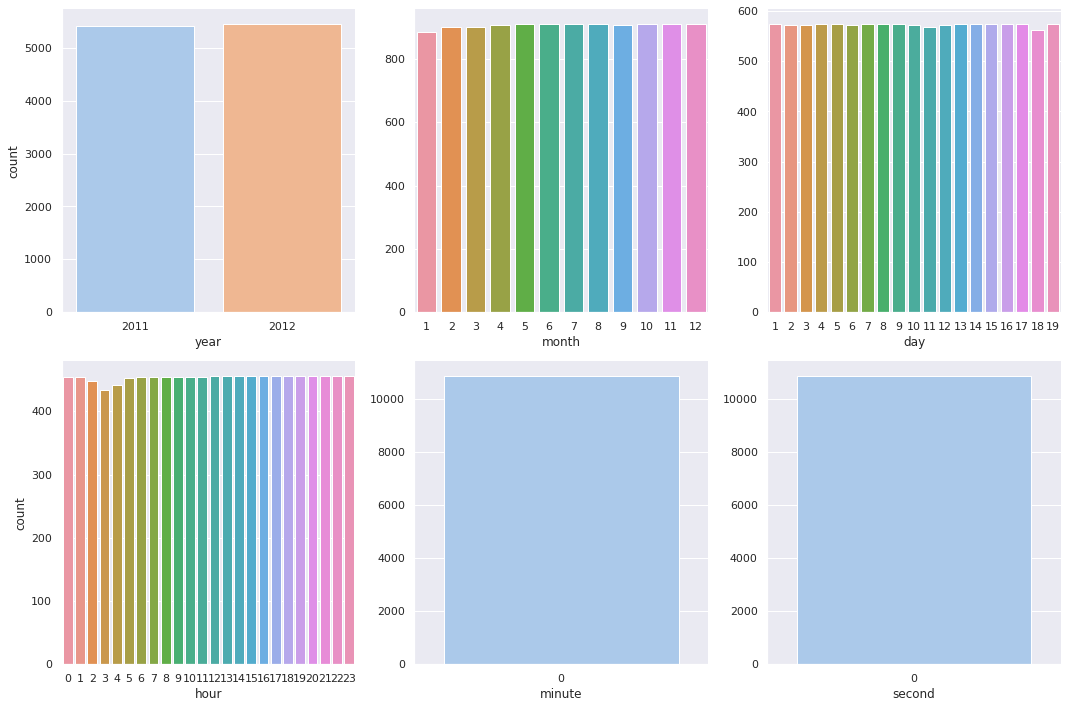

In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=train, x='year')

plt.subplot(2, 3, 2)
sns.countplot(data=train, x='month')
plt.ylabel("")

plt.subplot(2, 3, 3)
sns.countplot(data=train, x='day')
plt.ylabel("")

plt.subplot(2, 3, 4)
sns.countplot(data=train, x='hour')

plt.subplot(2, 3, 5)
sns.countplot(data=train, x='minute')
plt.ylabel("")

plt.subplot(2, 3, 6)
sns.countplot(data=train, x='second')
plt.ylabel("")

plt.tight_layout()
plt.show()

<AxesSubplot:>

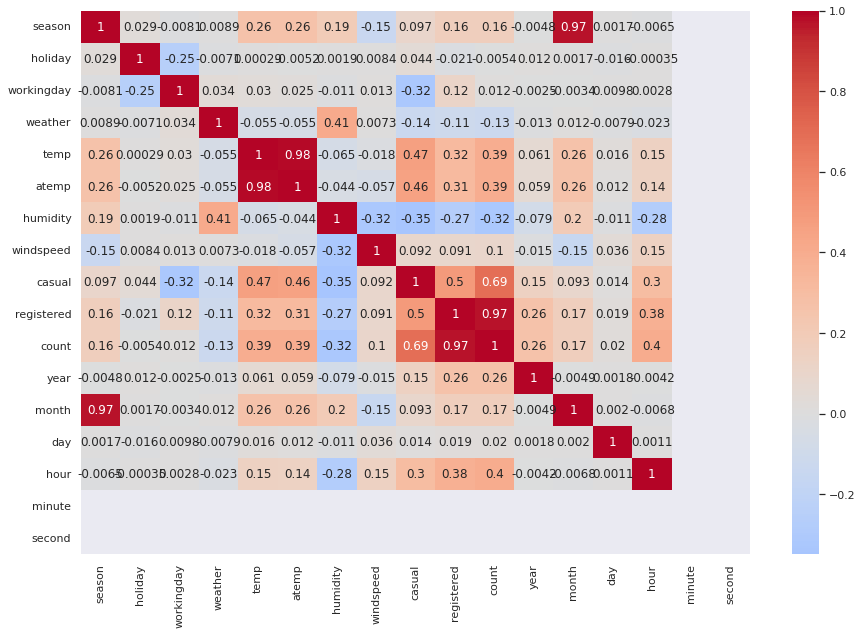

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center=0)

In [22]:
col = train.columns.tolist()
col.remove("count")
col.remove("datetime")
print(col)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute', 'second']


In [23]:
x = train[['season', 'weather', 'temp', 'atemp', 'humidity', 'year', 'month', 'hour']].values
y = train['count'].values
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.2)
model=LinearRegression()
model.fit(train_input,train_target)

LinearRegression()

In [24]:
predictions = model.predict(test_input)
predictions

array([ 12.6044893 , -14.99920793, 201.85732202, ...,  75.18964263,
       187.9065365 , 371.93833562])

In [25]:
test_target - predictions

array([  -9.6044893 ,   26.99920793,  -54.85732202, ...,  -11.18964263,
       -134.9065365 ,  268.06166438])

In [26]:
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)

print(f"RMSE점수 : {rmse}")
print(f"MSE점수 : {mse}")

RMSE점수 : 138.0127343482147
MSE점수 : 19047.51484227088


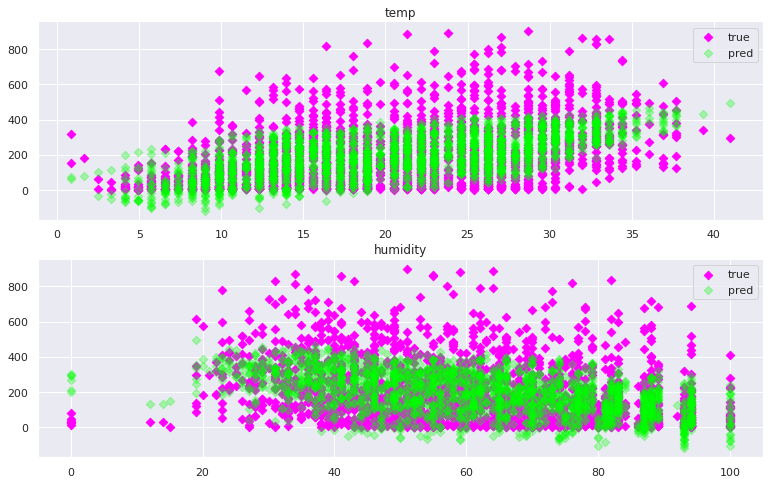

In [27]:
plt.figure(figsize=(13, 8))

plt.subplot(2, 1, 1)
plt.scatter(test_input[:, 2], test_target, label="true", color="magenta", marker= "D")
plt.scatter(test_input[:, 2], predictions, label="pred", color="lime",alpha = 0.3, marker = 'D')
plt.title("temp")
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(test_input[:, 4], test_target, label="true", color="magenta", marker= "D")
plt.scatter(test_input[:, 4], predictions, label="pred", color="lime", alpha = 0.3, marker = 'D')
plt.title("humidity")
plt.legend()

plt.show()